In [2]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost.sklearn import XGBClassifier
import pandas as pd
import pickle
import zipfile

# AIRBNB

In [110]:
model2 = XGBClassifier()

In [111]:
feature_dir2 = '../data/airbnb_features.csv'
target_dir2 = '../data/airbnb_target.csv'
model_save_dir2 = "../data/output/tab"

In [112]:
feature2 = pd.read_csv(feature_dir2, index_col = 0)
feature2.head()

,host_response_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,...,transit: 45,transit: visit,transit: surrounding,transit: rainier,transit: per,transit: long,transit: give,transit: frequent,transit: four,transit: each
0,96.0,3.0,4.0,1.0,1.0,1.0,85.0,0.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
1,98.0,6.0,4.0,1.0,1.0,1.0,150.0,100.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,67.0,2.0,11.0,4.5,5.0,7.0,975.0,1000.0,300.0,10.0,...,0,0,0,0,0,0,0,0,0,0
3,100.0,2.0,6.0,2.0,3.0,3.0,450.0,700.0,125.0,6.0,...,0,0,0,0,0,0,0,0,0,0
4,184.0,1.0,2.0,1.0,1.0,1.0,120.0,0.0,40.0,1.0,...,0,0,0,0,0,0,0,0,0,0


In [114]:
target2 = pd.read_csv(target_dir2, index_col = 0)
target2.head()

,review_scores_rating
0,0
1,0
2,1
3,0
4,0


In [115]:
train_X2, test_X2, train_y2, test_y2 = train_test_split(feature2, target2, random_state = 42)
len(train_X2), len(test_X2)

(2133, 711)

In [116]:
model2 = model2.fit(train_X2, train_y2)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


[18:57:21] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [117]:
pred_test_y2 = model2.predict(test_X2)

In [118]:
accuracy_score(pred_test_y2, test_y2)

0.6779184247538678

In [120]:
#with open(model_save_dir, 'wb') as file:
#    pickle.dump(model, file)

### PDP

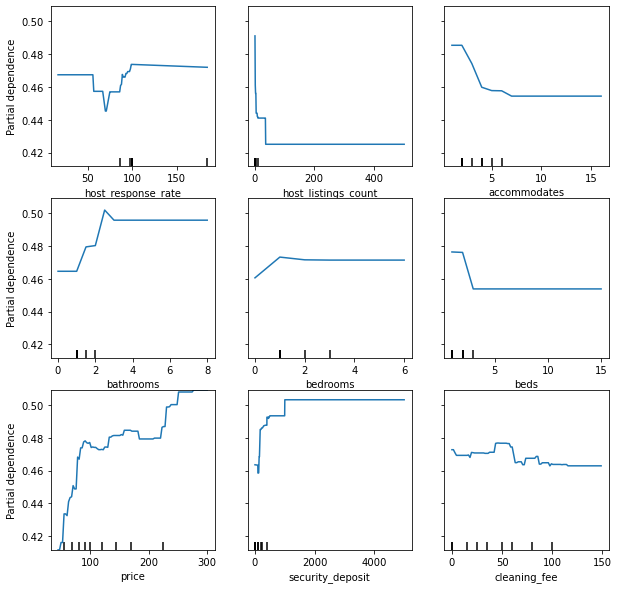

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(model2, features=[i for i in range(9)], X=train_X2,feature_names=feature2.columns,ax=ax)

### LIME

In [123]:
limeexplainer2 = lime.lime_tabular.LimeTabularExplainer(train_X2.values, mode='classification', feature_selection = 'auto', feature_names=feature2.columns,class_names = [0,1], 
                                                   kernel_width=None,discretize_continuous=True)

Predicted:  1


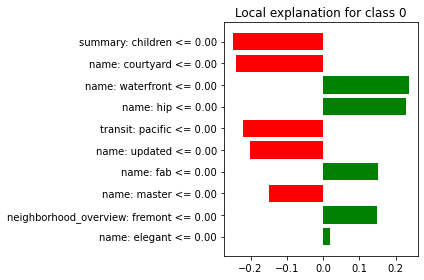

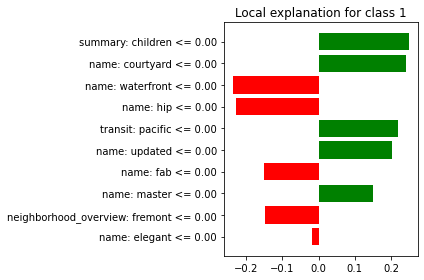

In [124]:
# Now explain a prediction
exp = limeexplainer2.explain_instance(test_X2.iloc[0], 
                                     model2.predict_proba,
                                     labels = [0,1])

print('Predicted: ', pred_test_y2[0])

exp.as_pyplot_figure(label = 0)
from matplotlib import pyplot as plt
plt.tight_layout()

exp.as_pyplot_figure(label = 1)
plt.tight_layout()

### SHAP

In [174]:
shapexplainer2 = shap.Explainer(model2)

In [176]:
shap_values2 = shapexplainer2(train_X2)

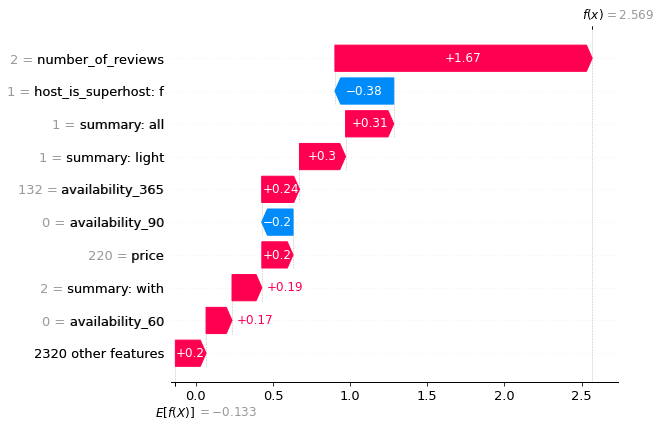

In [185]:
shap.plots.waterfall(shap_values2[0])

### Permutation Feature Importance

In [125]:
#  The permutation feature importance is defined to be the decrease in a model score 
#when a single feature value is randomly shuffled
from sklearn.inspection import permutation_importance

In [168]:
r2 = permutation_importance(model2, test_X2, test_y2,n_repeats=10,random_state=0)

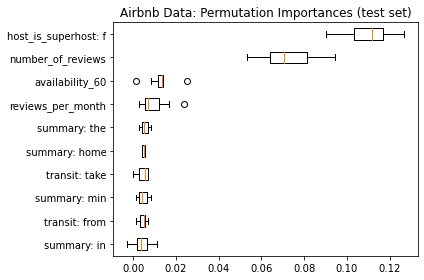

In [169]:
sorted_idx2 = r2.importances_mean.argsort()[::-1][:10][::-1]

fig, ax = plt.subplots()
ax.boxplot(
    r2.importances[sorted_idx2].T, vert=False, labels=test_X2.columns[sorted_idx2]
)
ax.set_title("Airbnb Data: Permutation Importances (test set)")
fig.tight_layout()
plt.show()

# LOAN

In [3]:
model = XGBClassifier()

In [4]:
loan_dir = '../data/feature_engineered_loan_data.csv.zip'
model_save_dir = "../data/output/tab"

In [5]:
zf = zipfile.ZipFile(loan_dir) 
#loan = pd.read_csv(zf.open('feature_engineered_loan_data.csv'))
loan = pd.read_csv('../data/loan_downsampled.csv')

In [13]:
loan.shape

(49650, 188)

In [6]:
feature = loan.drop(['Target','Unnamed: 0'], 1)
feature.head()

/var/folders/s5/ysjjjszj3jj4ydswlqm14w100000gn/T/ipykernel_44396/169164214.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  feature = loan.drop(['Target','Unnamed: 0'], 1)


,NAME_CONTRACT_TYPE: Cash loans,NAME_CONTRACT_TYPE: Revolving loans,CODE_GENDER: F,CODE_GENDER: M,CODE_GENDER: XNA,FLAG_OWN_CAR: N,FLAG_OWN_CAR: Y,FLAG_OWN_REALTY: N,FLAG_OWN_REALTY: Y,NAME_TYPE_SUITE: Children,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,4.0
3,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
target = loan[['Target']]
target.head()

,Target
0,1
1,1
2,1
3,1
4,1


In [8]:
train_X, test_X, train_y, test_y = train_test_split(feature, target, random_state = 42)
len(train_X), len(test_X)

(37237, 12413)

In [9]:
model = model.fit(train_X, train_y)

/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[16:29:19] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [10]:
pred_test_y = model.predict(test_X)

In [11]:
accuracy_score(pred_test_y, test_y)

0.6792878433899944

In [ ]:
#with open(model_save_dir, 'wb') as file:
#    pickle.dump(model, file)

### PDP

In [14]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

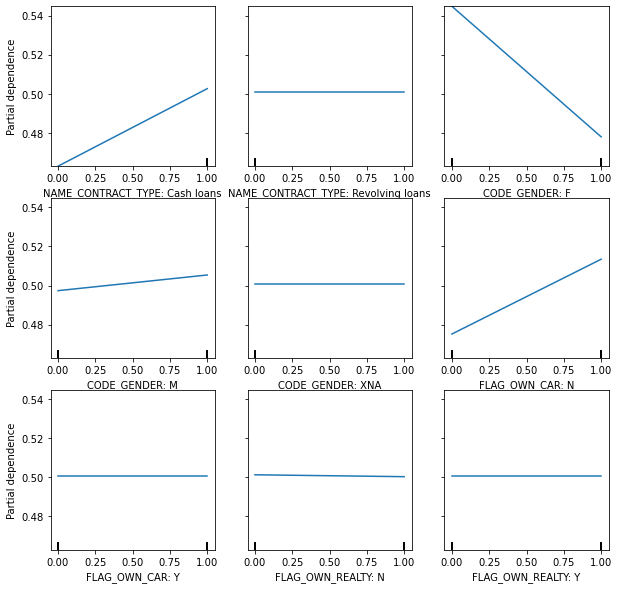

In [15]:
fig, ax = plt.subplots(figsize=(10, 10))
PartialDependenceDisplay.from_estimator(model, features=[i for i in range(9)], X=train_X,feature_names=feature.columns,ax=ax)

### LIME

In [16]:
# https://towardsdatascience.com/a-guide-to-interpretable-machine-learning-2-fa3c4489fb53
import lime.lime_tabular

In [17]:
limeexplainer = lime.lime_tabular.LimeTabularExplainer(train_X.values, mode='classification', feature_selection = 'auto', feature_names=feature.columns,class_names = [0,1], 
                                                   kernel_width=None,discretize_continuous=True)

Predicted:  0


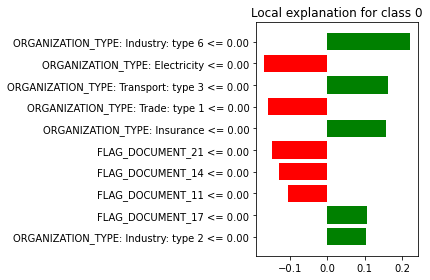

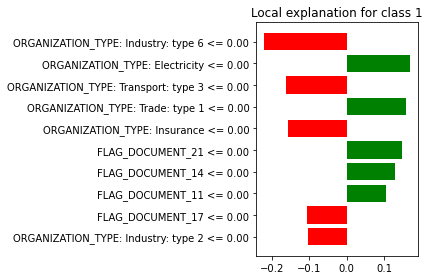

In [18]:
# Now explain a prediction
exp = limeexplainer.explain_instance(test_X.iloc[0], 
                                     model.predict_proba,
                                     labels = [0,1])

print('Predicted: ', pred_test_y[0])

exp.as_pyplot_figure(label = 0)
from matplotlib import pyplot as plt
plt.tight_layout()

exp.as_pyplot_figure(label = 1)
plt.tight_layout()

### SHAP

In [19]:
# https://github.com/slundberg/shap
import shap

In [20]:
shapexplainer = shap.Explainer(model)

In [21]:
shap_values = shapexplainer(train_X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


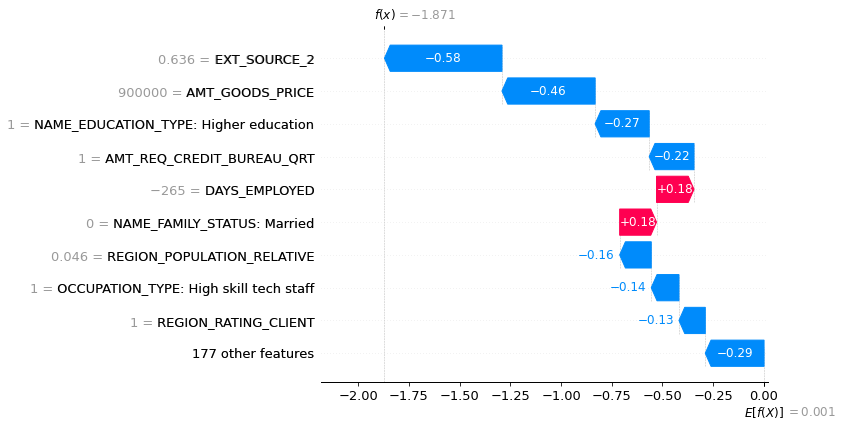

In [22]:
shap.plots.waterfall(shap_values[0])

### Permutation Feature Importance

In [24]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, test_X, test_y,n_repeats=10,random_state=0)

In [25]:
sorted_idx = r.importances_mean.argsort()[::-1][:10][::-1]

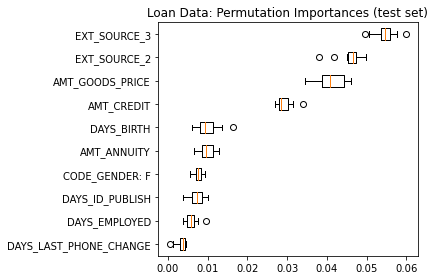

In [26]:
fig, ax = plt.subplots()
ax.boxplot(
    r.importances[sorted_idx].T, vert=False, labels=test_X.columns[sorted_idx]
)
ax.set_title("Loan Data: Permutation Importances (test set)")
fig.tight_layout()
plt.show()